In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.options.display.max_columns=None
import pandas as pd
import numpy as np

import time, warnings
import datetime as dt

#modules for predictive models
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#from sklearn.mixture import GMM

from sklearn.metrics import silhouette_samples, silhouette_score

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("sales_data.xlsx")
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,13,13,29,25,19,15,10,1287.50,1054.15,2842.52,2133.79,2051.94,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,11,13,10,13,14,10,11,1253.08,2003.25,1819.75,1114.83,1791.86,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,5,4,3,5,5,8,13,698.95,504.97,197.97,1182.97,733.96,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,10,8,5,8,5,3,5,1753.95,1400.23,570.48,1154.06,798.07,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,2,3,8,8,12,10,12,150.98,330.38,1090.23,563.63,1339.44,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [3]:
data=df.copy()

# RFM Analysis
# RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
# RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

# RECENCY (R): Days since last purchase
# FREQUENCY (F): Total number of purchases
# MONETARY VALUE (M): Total money this customer spent.
# We will create those 3 customer attributes for each customer.

# Recency
# To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [4]:
data['LATEST_ORDER_DATE'].max()

Timestamp('2021-10-24 00:00:00')

In [5]:
# The last date we have is 2021-10-24 so we will use it as reference.

In [6]:
now = dt.date(2021,10,24)
print(now)

2021-10-24


In [7]:
data['date'] = data['LATEST_ORDER_DATE'].dt.date

In [8]:
data.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,date
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,13,13,29,25,19,15,10,1287.50,1054.15,2842.52,2133.79,2051.94,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44,2021-10-24
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,11,13,10,13,14,10,11,1253.08,2003.25,1819.75,1114.83,1791.86,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55,2021-10-24
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,5,4,3,5,5,8,13,698.95,504.97,197.97,1182.97,733.96,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80,2021-10-24
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,10,8,5,8,5,3,5,1753.95,1400.23,570.48,1154.06,798.07,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23,2021-10-24
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,2,3,8,8,12,10,12,150.98,330.38,1090.23,563.63,1339.44,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50,2021-10-24


In [9]:
#group by customers and check last date of purshace
recency_df = data.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,1,2021-09-02
1,2,2021-07-23
2,3,2021-09-02
3,4,2021-10-20
4,5,2021-06-17


In [10]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [11]:
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,1,2021-09-02,52
1,2,2021-07-23,93
2,3,2021-09-02,52
3,4,2021-10-20,4
4,5,2021-06-17,129


In [12]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

# Now we have the recency attribute created. e.g: Customer with ID = 1 did his/her last purshace 52 days ago.

# Frequency
# Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many total_orders are registered by the same customer.

In [13]:
# we have already data of total_orders made by each customer id
frequency_df=data[['CustomerID','TOTAL_ORDERS']]
frequency_df

,CustomerID,TOTAL_ORDERS
0,22,124
1,29,82
2,83,43
3,95,44
4,124,55
...,...,...
4995,173946,1
4996,173987,1
4997,174004,1
4998,174038,1


# Monetary
 # Monetary attribute answers the question: How much money did the customer spent over time?



In [14]:
monetary_df = data.groupby(by='CustomerID',as_index=False)['REVENUE'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,1,34847.40
1,2,32486.98
2,3,24178.97
3,4,18554.49
4,5,16884.99


# Create RFM Table

In [15]:
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,TOTAL_ORDERS
0,1,52,61
1,2,93,59
2,3,52,53
3,4,4,84
4,5,129,26


In [16]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()

,Recency,TOTAL_ORDERS,Monetary
CustomerID,,,
1,52,61,34847.40
2,93,59,32486.98
3,52,53,24178.97
4,4,84,18554.49
5,129,26,16884.99


In [17]:
rfm_df.rename({'TOTAL_ORDERS':'frequency'},axis=1,inplace=True)

In [18]:
rfm_df.head()

,Recency,frequency,Monetary
CustomerID,,,
1,52,61,34847.40
2,93,59,32486.98
3,52,53,24178.97
4,4,84,18554.49
5,129,26,16884.99


In [19]:
# Customer with ID = 1 has recency: 52 days, frequency:61, and monetary: 34847.40

# RFM Table Correctness verification

In [20]:
data[data['CustomerID']==1]

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,date
2266,1,61,34847.4,571.27,297.5,4.88,2020-03-03,2021-09-02,8.98,53,15,11,9,9,5,3,9,12819.41,5166.31,5877.44,1271.58,1459.05,324.48,7929.13,13,15,19,14,8143.65,5648.08,12946.22,8109.45,11,3,29,18,2293.9,1809.47,17749.01,12995.02,2021-09-02


In [21]:
(now - dt.date(2021,9,2)).days == 52

True

In [22]:
# As we can see our RFM table is correct. The first customer bought 61 times , and  with huge amount.

# Customer segments with RFM Model¶
# Before moving to customer segments, Let's see the application of Pareto Principle – commonly referred to as the 80-20 rule on our dataset by applying it to our RFM variables.

# Pareto’s rule says 80% of the results come from 20% of the causes.

# Similarly, 20% customers contribute to 80% of your total revenue. Let's verify that because that will help us know which customers to focus on when marketing new products.

In [23]:
#get the 80% of the revenue
pareto_cutoff = rfm_df['Monetary'].sum() * 0.8
print("The 80% of total revenue is: ",round(pareto_cutoff,2))

The 80% of total revenue is:  6726095.36


In [24]:
customers_rank = rfm_df
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary'].rank(ascending=0)
#customers_rank.drop('RevenueRank',axis=1,inplace=True)
customers_rank.head()

,Recency,frequency,Monetary,Rank
CustomerID,,,,
1,52,61,34847.40,1.0
2,93,59,32486.98,2.0
3,52,53,24178.97,3.0
4,4,84,18554.49,4.0
5,129,26,16884.99,5.0


In [25]:
customers_rank.sort_values('Rank',ascending=True)

,Recency,frequency,Monetary,Rank
CustomerID,,,,
1,52,61,34847.40,1.0
2,93,59,32486.98,2.0
3,52,53,24178.97,3.0
4,4,84,18554.49,4.0
5,129,26,16884.99,5.0
...,...,...,...,...
248709,53,2,59.95,4996.0
248710,118,2,59.94,4997.0
259042,127,2,51.94,4998.0


In [26]:
#get top 20% of the customers
top_20_cutoff = 5000 *20 /100
top_20_cutoff

1000.0

In [27]:
#sum the monetary values over the customer with rank <=1000
revenueByTop20 = customers_rank[customers_rank['Rank'] <= 1000]['Monetary'].sum()
revenueByTop20

4678907.359999999

# Applying RFM score formula
# The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

# Note: Quintiles (score from 1-4) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 444 possible combinations. So, we will use quartiles.

In [28]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,frequency,Monetary,Rank
0.25,6.00,3.0,315.0975,1250.75
0.50,67.00,8.0,966.7250,2500.50
0.75,170.25,20.0,2493.0725,3750.25


In [29]:
# Creation of RFM segmentation table
# We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good.

In [30]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [31]:
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [32]:
rfm_segmentation.head()

,Recency,frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,,
1,52,61,34847.40,1.0,3,4,4
2,93,59,32486.98,2.0,2,4,4
3,52,53,24178.97,3.0,3,4,4
4,4,84,18554.49,4.0,4,4,4
5,129,26,16884.99,5.0,2,4,4


In [33]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
1,52,61,34847.40,1.0,3,4,4,344
2,93,59,32486.98,2.0,2,4,4,244
3,52,53,24178.97,3.0,3,4,4,344
4,4,84,18554.49,4.0,4,4,4,444
5,129,26,16884.99,5.0,2,4,4,244


# Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

# Let's see who are our Champions (best customers).

In [34]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
4,4,84,18554.49,4.0,4,4,4,444
17,5,36,12969.98,17.0,4,4,4,444
22,0,124,11986.54,22.0,4,4,4,444
29,0,82,11025.96,29.0,4,4,4,444
35,4,32,9685.37,35.0,4,4,4,444
36,6,42,9516.90,36.0,4,4,4,444
40,5,26,9099.36,40.0,4,4,4,444
41,1,44,9006.15,41.0,4,4,4,444
46,5,43,8854.30,46.0,4,4,4,444


# Let's see who are our Customers need attention.

In [35]:
rfm_segmentation[rfm_segmentation['RFMScore']=='111'].sort_values('Monetary', ascending=False).head(10)

,Recency,frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
72029,206,2,314.98,3752.5,1,1,1,111
72123,206,3,314.47,3755.0,1,1,1,111
72239,206,3,313.98,3757.0,1,1,1,111
72496,206,2,312.98,3761.5,1,1,1,111
72508,190,3,312.98,3761.5,1,1,1,111
72589,206,3,312.47,3763.0,1,1,1,111
72631,206,3,312.17,3765.0,1,1,1,111
73177,206,3,310.00,3775.0,1,1,1,111
73256,206,3,309.98,3776.0,1,1,1,111


In [36]:
rfm_segmentation[rfm_segmentation['RFMScore']=='112'].sort_values('Monetary', ascending=False).head(10)

,Recency,frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
14806,206,2,929.98,2538.0,1,1,2,112
18812,206,2,813.99,2663.0,1,1,2,112
19283,206,2,801.99,2674.0,1,1,2,112
20146,203,3,782.19,2700.0,1,1,2,112
20306,187,3,779.04,2704.0,1,1,2,112
20706,206,3,770.27,2711.0,1,1,2,112
22834,206,3,726.97,2765.0,1,1,2,112
23835,206,1,708.39,2794.0,1,1,2,112
27567,206,1,645.99,2878.5,1,1,2,112


In [37]:
rfm_segmentation[rfm_segmentation['RFMScore']=='121'].sort_values('Monetary', ascending=False).head(10)

,Recency,frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
72376,206,7,313.46,3759.0,1,2,1,121
72607,206,4,312.36,3764.0,1,2,1,121
72873,206,5,311.18,3771.0,1,2,1,121
73403,182,4,309.42,3780.0,1,2,1,121
73413,206,4,309.37,3781.0,1,2,1,121
74433,206,5,305.37,3795.0,1,2,1,121
74485,206,4,305.09,3798.0,1,2,1,121
75406,206,4,301.97,3811.0,1,2,1,121
76835,206,5,296.98,3835.5,1,2,1,121


In [38]:
rfm_segmentation[rfm_segmentation['RFMScore']=='122'].sort_values('Monetary', ascending=False).head(10)

,Recency,frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
13852,206,6,963.65,2504.0,1,2,2,122
13938,206,7,960.13,2506.0,1,2,2,122
13994,206,6,958.44,2511.0,1,2,2,122
14477,206,5,941.19,2525.0,1,2,2,122
14640,206,7,935.96,2531.0,1,2,2,122
14884,206,8,927.74,2542.0,1,2,2,122
14894,177,8,927.46,2543.0,1,2,2,122
15708,206,6,900.94,2570.0,1,2,2,122
15804,206,7,897.97,2574.0,1,2,2,122


# Let's see who are our  'Potential customers' .

In [39]:
rfm_segmentation[rfm_segmentation['RFMScore']=='333'].sort_values('Monetary', ascending=False).head(10)

,Recency,frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
1699,15,20,2487.61,1256.0,3,3,3,333
1724,11,16,2467.64,1265.0,3,3,3,333
1755,60,19,2445.95,1275.0,3,3,3,333
1765,56,17,2442.37,1278.0,3,3,3,333
1781,57,12,2434.50,1285.0,3,3,3,333
1834,23,17,2410.96,1297.0,3,3,3,333
1903,13,19,2378.04,1322.0,3,3,3,333
1921,36,20,2370.96,1325.0,3,3,3,333
1935,9,20,2364.63,1328.0,3,3,3,333


In [40]:
rfm_segmentation[rfm_segmentation['RFMScore']=='443'].sort_values('Monetary', ascending=False).head(10)

,Recency,frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
1717,0,27,2475.84,1260.0,4,4,3,443
1721,0,29,2469.36,1263.0,4,4,3,443
1753,4,34,2447.67,1273.0,4,4,3,443
1780,2,24,2434.87,1284.0,4,4,3,443
1787,0,26,2432.01,1286.0,4,4,3,443
1804,1,38,2426.32,1290.0,4,4,3,443
1810,2,25,2422.50,1292.0,4,4,3,443
1830,1,21,2412.25,1295.0,4,4,3,443
1852,1,25,2402.37,1304.0,4,4,3,443


In [41]:
rfm_segmentation[rfm_segmentation['RFMScore']=='434'].sort_values('Monetary', ascending=False).head(10)

,Recency,frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,,
63,5,18,8163.52,63.0,4,3,4,434
73,4,20,7721.85,73.0,4,3,4,434
149,2,17,5907.81,149.0,4,3,4,434
218,5,15,5218.89,218.0,4,3,4,434
227,6,20,5151.19,227.0,4,3,4,434
237,6,17,5118.83,237.0,4,3,4,434
258,0,19,4967.06,258.0,4,3,4,434
324,3,20,4611.88,324.0,4,3,4,434
386,2,15,4270.99,386.0,4,3,4,434


# To gain even further insight into customer behavior, we can dig deeper in the relationship between RFM variables.

RFM model can be used in conjunction with certain predictive models like k-means clustering, Logistic Regression and Recommendation to produce better informative results on customer behavior.

We will go for k-means since it has been widely used for Market Segmentation and it offers the advantage of being simple to implemen

 # Applying K-means clustering on RFM variables

In [42]:
# preprocessing the data

In [43]:
rfm_data = rfm_df.drop(['R_Quartile','F_Quartile','M_Quartile','RFMScore','Rank'],axis=1)
rfm_data.head()

,Recency,frequency,Monetary
CustomerID,,,
1,52,61,34847.40
2,93,59,32486.98
3,52,53,24178.97
4,4,84,18554.49
5,129,26,16884.99


#  Visualize feature distributions

To get a better understanding of the dataset, we can construct a scatter matrix of each of the three features present in the RFM data. 
We can notice that we have a skewed distribution of the 3 variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed

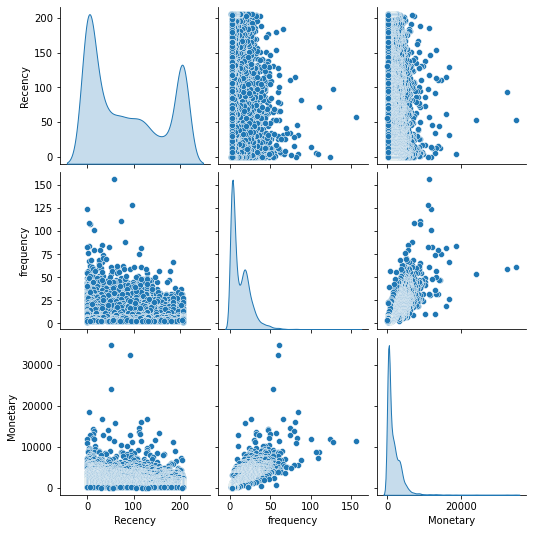

In [44]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(rfm_data,diag_kind='kde')

<AxesSubplot:>

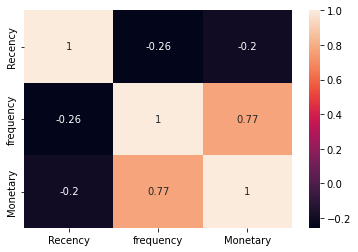

In [45]:
sns.heatmap(rfm_data.corr(),annot=True)

In [46]:
features = rfm_data.columns

In [47]:
features

Index(['Recency', 'frequency', 'Monetary'], dtype='object')

In [48]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
rfm_data = pd.DataFrame(pt.fit_transform(rfm_data),columns=rfm_data.columns)
rfm_data.head()

,Recency,frequency,Monetary
0,0.053465,2.053604,3.149754
1,0.468434,2.018052,3.088395
2,0.053465,1.903821,2.830332
3,-1.067465,2.395761,2.599437
4,0.737001,1.152603,2.517315


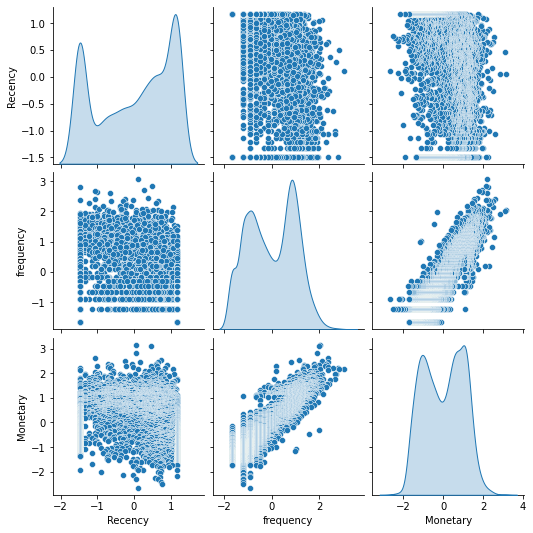

In [49]:
sns.pairplot(rfm_data,diag_kind='kde')

<AxesSubplot:>

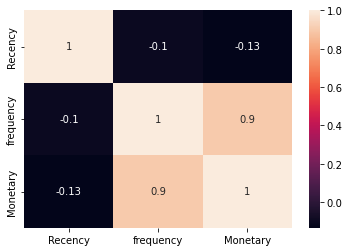

In [50]:
sns.heatmap(rfm_data.corr(),annot=True)

On one hand, we have a negative correlation between:
Recency and Frequency
Recency and Monetary
On the other hand, the correlation between Monetary and Frequency is positive.

AxesSubplot(0.125,0.125;0.775x0.755)


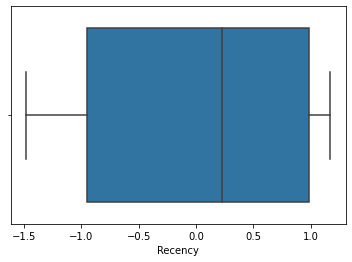

AxesSubplot(0.125,0.125;0.775x0.755)


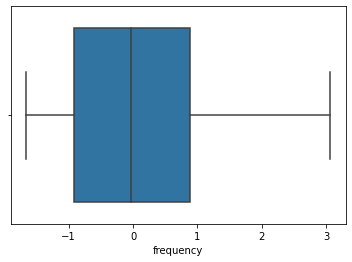

AxesSubplot(0.125,0.125;0.775x0.755)


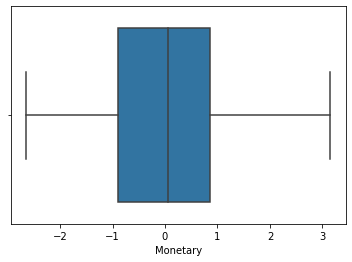

In [51]:
for i in rfm_data.columns:
    print(sns.boxplot(rfm_data[i]))
    plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
ss=StandardScaler()
rfm_data_sc=ss.fit_transform(rfm_data)
rfm_data_sc=pd.DataFrame(rfm_data_sc,columns=rfm_data.columns)

In [54]:
err=[]
for i in range(1,12):
    km=KMeans(n_clusters=i,random_state=10)
    km.fit(rfm_data_sc)
    err.append(km.inertia_)

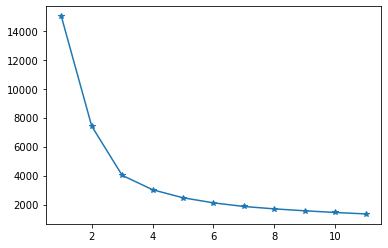

In [55]:
plt.plot(range(1,12),err,marker='*')

In [56]:
for i in range(2,12):
    km=KMeans(n_clusters=i,random_state=10)
    km.fit(rfm_data_sc)
    sil_score=silhouette_score(rfm_data_sc,km.labels_)
    print(i,'=',sil_score)

2 = 0.45350156861276303
3 = 0.5290492978077626
4 = 0.4504459436264373
5 = 0.4154415751617815
6 = 0.3871059417609662
7 = 0.3573456071242018
8 = 0.34182720588743726
9 = 0.329119019480639
10 = 0.31286926651566316
11 = 0.32637413863053916


In [57]:
# dendogram
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet,linkage,dendrogram

In [58]:
link=['ward','average','complete','single']
for i in link:
    z=linkage(rfm_data_sc,i)
    c,coph=cophenet(z,pdist(rfm_data_sc))
    print(i,c,coph)

ward 0.7225090390218869 [ 0.49452942  0.35279657 23.32356421 ...  0.10415367  3.41662837
  3.41662837]
average 0.7638623266088211 [0.46141245 0.35279657 1.72797784 ... 0.10415367 0.97624845 0.97624845]
complete 0.6845362994033293 [0.50184037 0.35279657 2.56362267 ... 0.10415367 1.48822248 1.48822248]
single 0.49123658545465815 [0.42098452 0.35279657 0.52675126 ... 0.10415367 0.47938855 0.47938855]


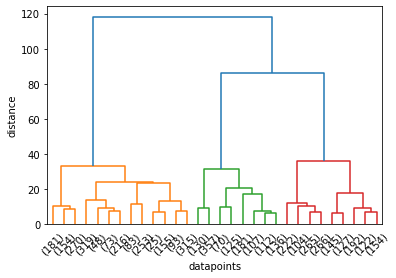

In [59]:
a=linkage(rfm_data_sc,method='ward')
dendrogram(a,truncate_mode='lastp',p=30)
plt.xlabel('datapoints')
plt.ylabel('distance')
plt.show()

In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
for i in range(2,12):
    agm=AgglomerativeClustering(n_clusters=i,linkage='ward')
    agm.fit(rfm_data_sc)
    sil_score=silhouette_score(rfm_data_sc,agm.labels_)
    print(i,'=',sil_score)    

2 = 0.41510597156978035
3 = 0.4992576795694222
4 = 0.414656015760046
5 = 0.32232423704323876
6 = 0.29384885278573886
7 = 0.2752949001039882
8 = 0.2895418932227023
9 = 0.3075660048805712
10 = 0.2852814050843781
11 = 0.27760534238366197


In [62]:
X=rfm_data
X.head()

,Recency,frequency,Monetary
0,0.053465,2.053604,3.149754
1,0.468434,2.018052,3.088395
2,0.053465,1.903821,2.830332
3,-1.067465,2.395761,2.599437
4,0.737001,1.152603,2.517315


In [63]:
# Number of clusters
kmeans = KMeans(n_clusters=3,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 0.98234582 -0.89397828 -0.96343116]
 [-0.00948059  0.90012828  0.89345022]
 [-1.37907258 -0.72168029 -0.60788513]]


In [64]:
colnames = ["Monetary", "Recency","frequency"]
prediction= kmeans.predict(X)
#X["clusters"] = prediction
X_df = pd.DataFrame(X, columns= colnames)
X_df["group"] = prediction

In [65]:
X_df.head()

,Monetary,Recency,frequency,group
0,3.149754,0.053465,2.053604,1
1,3.088395,0.468434,2.018052,1
2,2.830332,0.053465,1.903821,1
3,2.599437,-1.067465,2.395761,1
4,2.517315,0.737001,1.152603,1


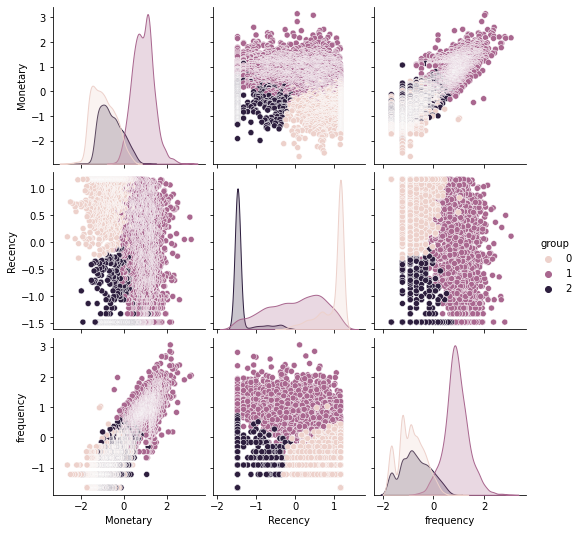

In [66]:
sns.pairplot(X_df,diag_kind='kde',hue='group')

In [67]:
df

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,13,13,29,25,19,15,10,1287.50,1054.15,2842.52,2133.79,2051.94,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,11,13,10,13,14,10,11,1253.08,2003.25,1819.75,1114.83,1791.86,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,5,4,3,5,5,8,13,698.95,504.97,197.97,1182.97,733.96,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,10,8,5,8,5,3,5,1753.95,1400.23,570.48,1154.06,798.07,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,2,3,8,8,12,10,12,150.98,330.38,1090.23,563.63,1339.44,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,1,0,0.00,0.00,117.49,0.00


In [68]:
data

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,date
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,13,13,29,25,19,15,10,1287.50,1054.15,2842.52,2133.79,2051.94,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44,2021-10-24
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,11,13,10,13,14,10,11,1253.08,2003.25,1819.75,1114.83,1791.86,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55,2021-10-24
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,5,4,3,5,5,8,13,698.95,504.97,197.97,1182.97,733.96,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80,2021-10-24
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,10,8,5,8,5,3,5,1753.95,1400.23,570.48,1154.06,798.07,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23,2021-10-24
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,2,3,8,8,12,10,12,150.98,330.38,1090.23,563.63,1339.44,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50,2021-10-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49,2021-04-01
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49,2021-04-01
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49,2021-04-01
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,1,0,0.00,0.00,117.49,0.00,2021-04-01


In [69]:
data['group']=prediction

In [70]:
data

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,date,group
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,13,13,29,25,19,15,10,1287.50,1054.15,2842.52,2133.79,2051.94,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44,2021-10-24,1
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,11,13,10,13,14,10,11,1253.08,2003.25,1819.75,1114.83,1791.86,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55,2021-10-24,1
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,5,4,3,5,5,8,13,698.95,504.97,197.97,1182.97,733.96,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80,2021-10-24,1
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,10,8,5,8,5,3,5,1753.95,1400.23,570.48,1154.06,798.07,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23,2021-10-24,1
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,2,3,8,8,12,10,12,150.98,330.38,1090.23,563.63,1339.44,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50,2021-10-24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49,2021-04-01,0
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49,2021-04-01,0
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49,2021-04-01,0
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,117.49,0.00,0.00,0.00,1,0,0,0,117.49,0.00,0.00,0.00,0,0,1,0,0.00,0.00,117.49,0.00,2021-04-01,0


In [71]:
data.isnull().sum()

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

In [72]:
# checking for outliers 

In [73]:
data_num=data.select_dtypes(include=np.number)
data_num.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,group
0,22,124,11986.54,96.67,529.59,4.27,14.19,1,13,13,29,25,19,15,10,1287.50,1054.15,2842.52,2133.79,2051.94,1496.33,1120.31,28,42,30,24,2685.37,4299.28,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44,1
1,29,82,11025.96,134.46,97.92,1.19,15.89,1,11,13,10,13,14,10,11,1253.08,2003.25,1819.75,1114.83,1791.86,1624.34,1418.85,18,19,19,26,1336.09,2776.02,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55,1
2,83,43,7259.69,168.83,171.69,3.99,33.12,1,5,4,3,5,5,8,13,698.95,504.97,197.97,1182.97,733.96,1223.96,2716.91,9,11,6,17,2299.93,1383.92,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80,1
3,95,44,6992.27,158.92,92.82,2.11,21.11,1,10,8,5,8,5,3,5,1753.95,1400.23,570.48,1154.06,798.07,630.00,685.48,12,15,9,8,2317.95,2417.22,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23,1
4,124,55,6263.44,113.88,179.04,3.26,6.65,1,2,3,8,8,12,10,12,150.98,330.38,1090.23,563.63,1339.44,956.56,1832.22,10,18,21,6,831.14,1938.18,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50,1


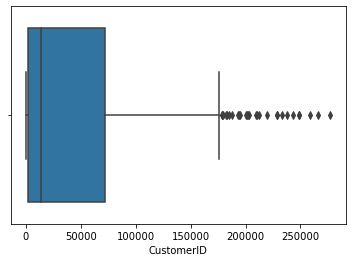

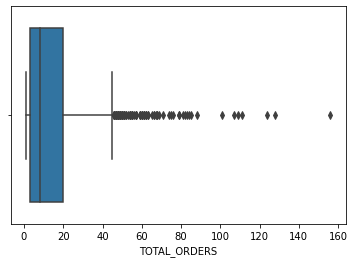

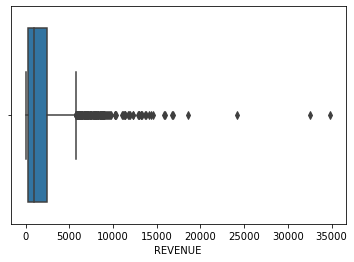

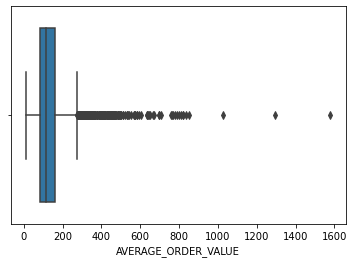

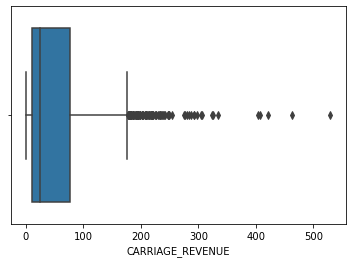

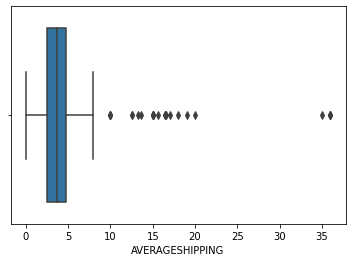

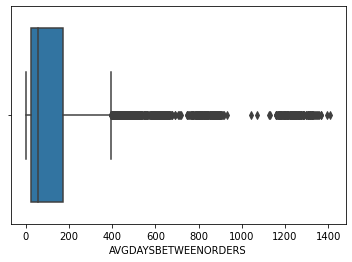

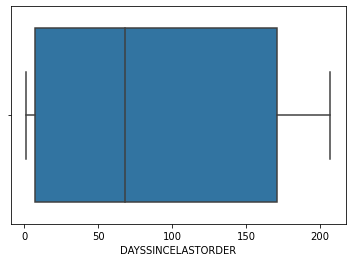

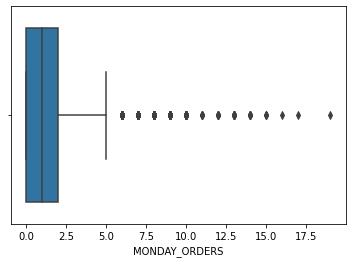

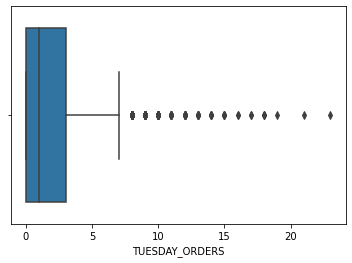

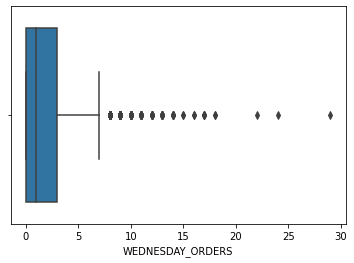

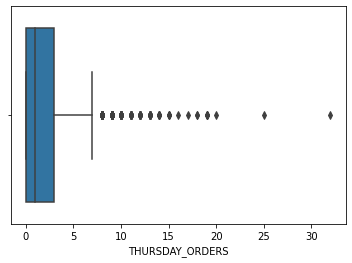

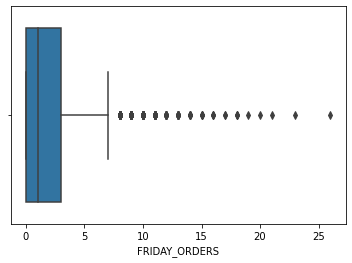

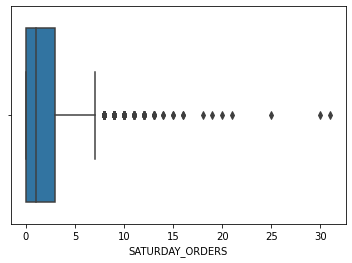

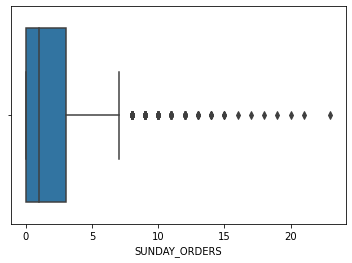

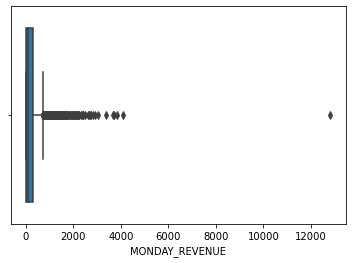

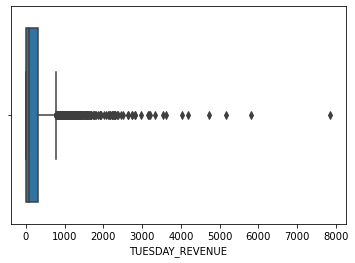

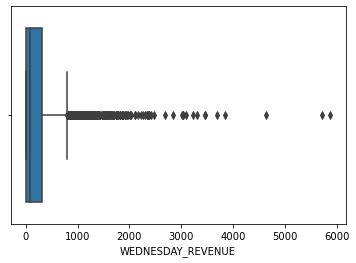

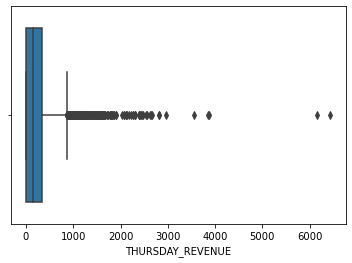

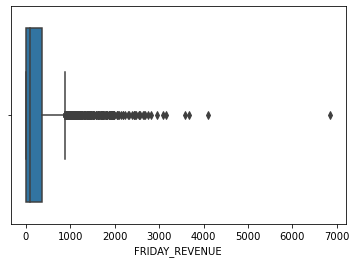

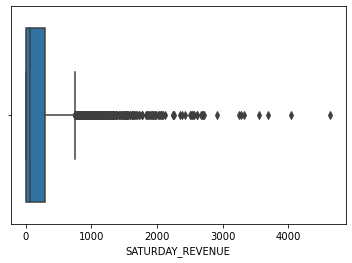

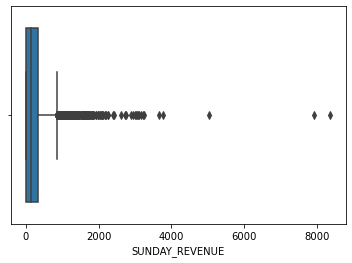

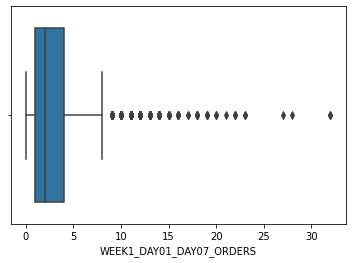

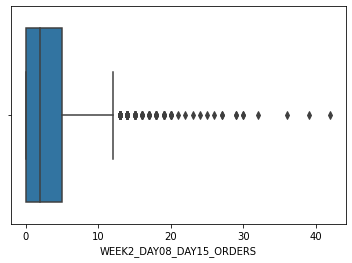

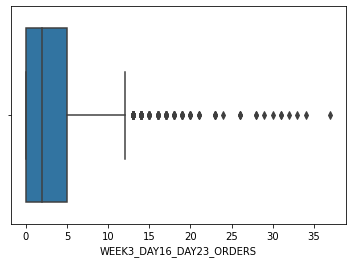

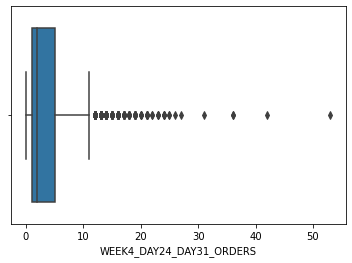

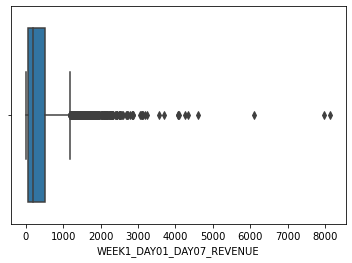

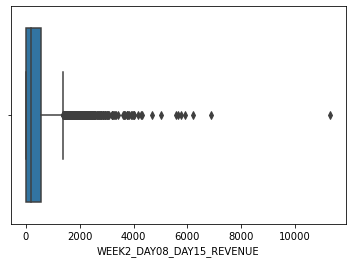

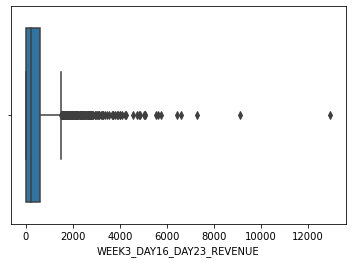

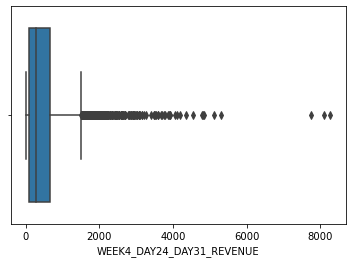

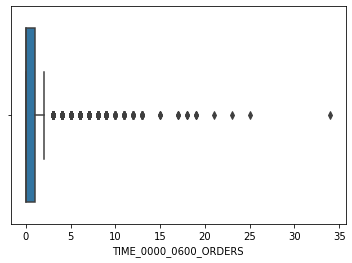

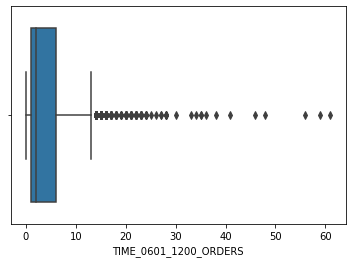

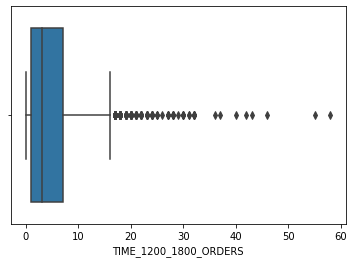

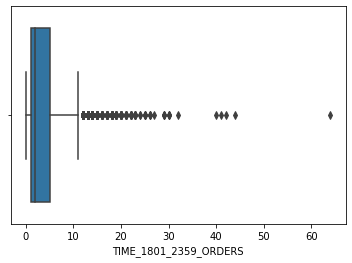

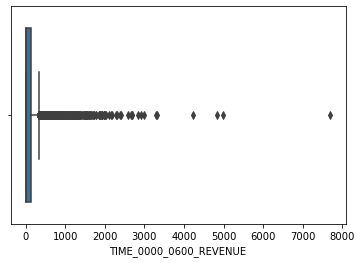

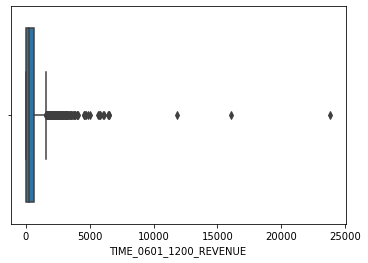

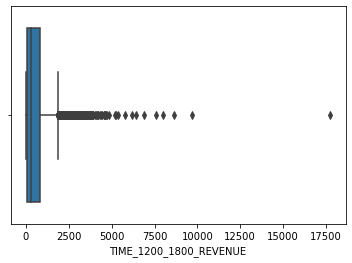

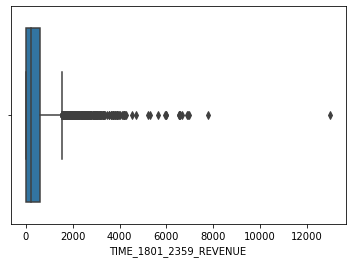

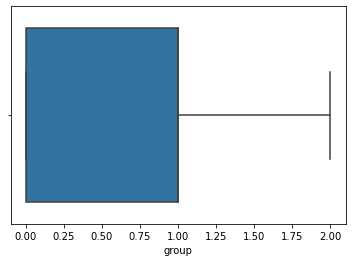

In [74]:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.show()

In [75]:
# there are outliers in the data and each and very data point is important to us . so we are not treating the outliers

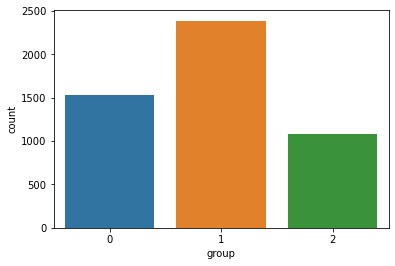

In [76]:
sns.countplot(data['group'])
plt.show()

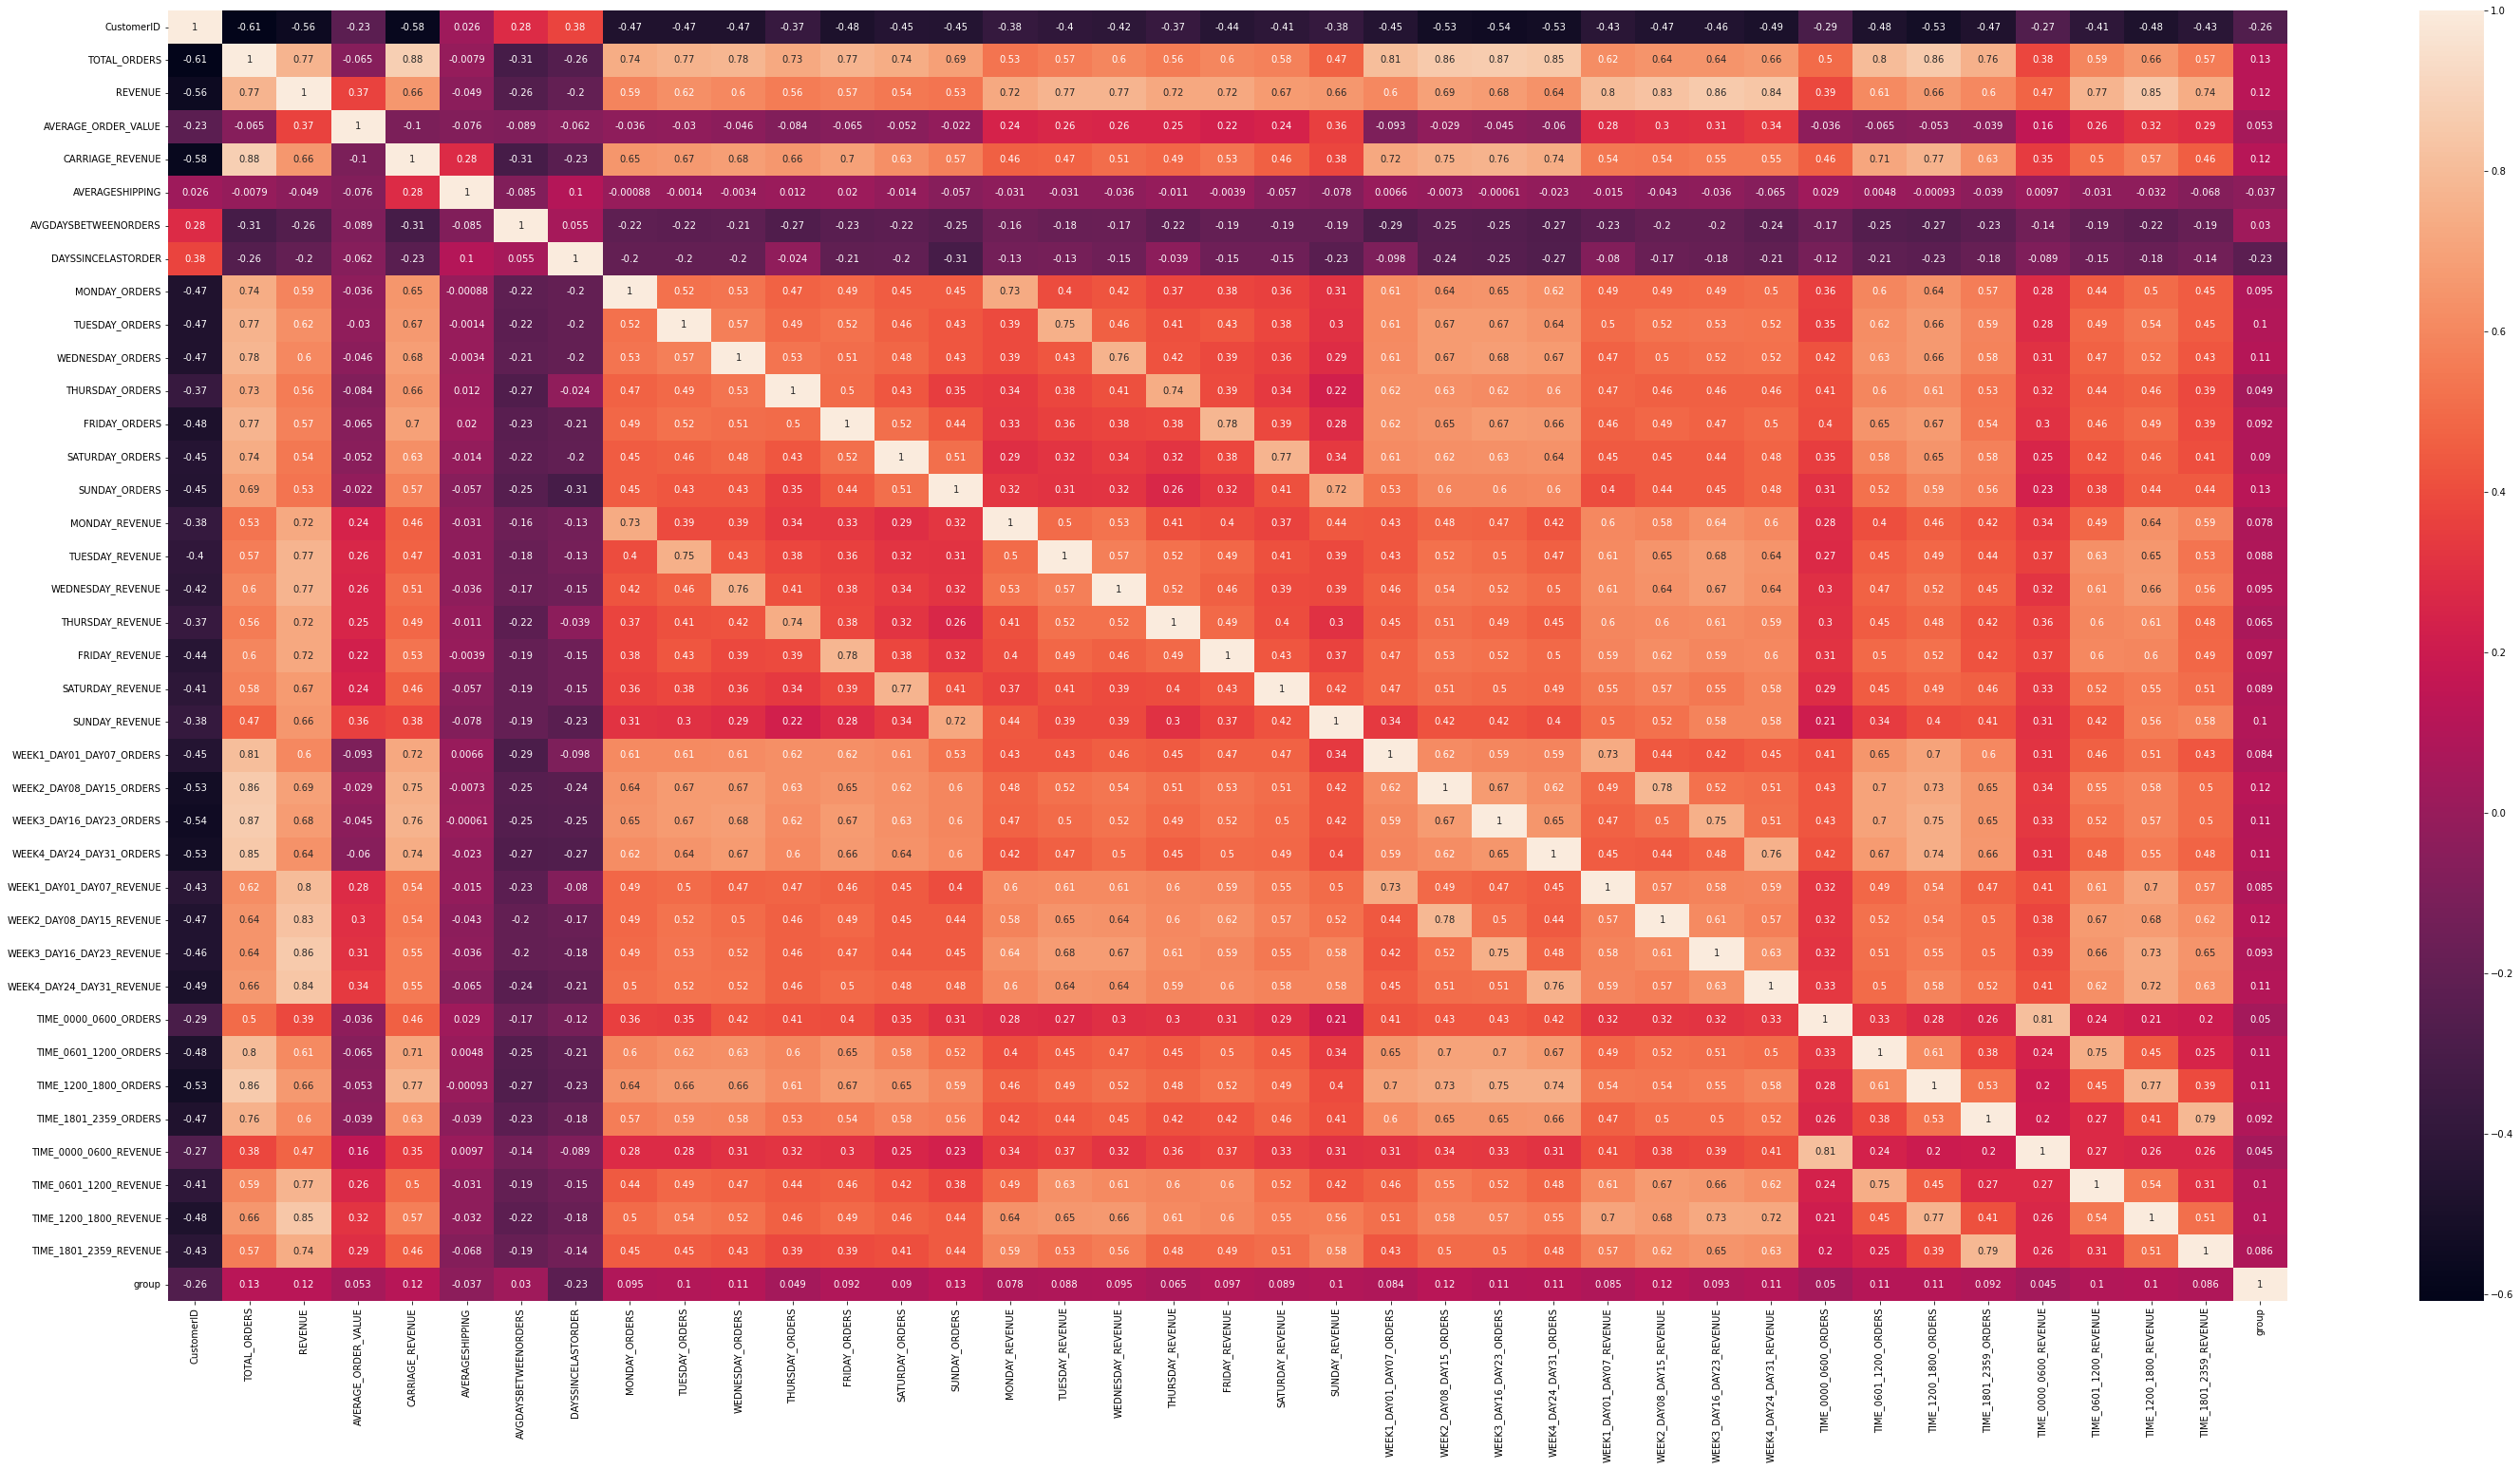

In [77]:
plt.figure(figsize=(50,25))
sns.heatmap(data.corr(),annot=True)
plt.show()

<Figure size 3600x1800 with 0 Axes>

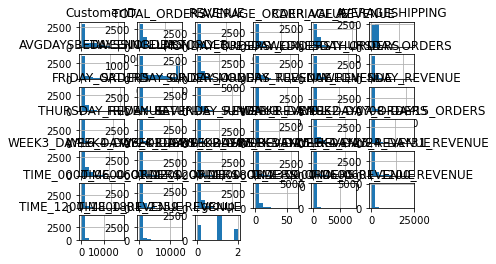

In [78]:
plt.figure(figsize=(50,25))
data_num.hist()
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='group'>

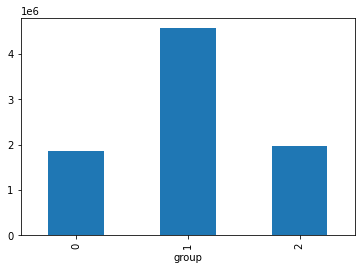

In [80]:
data.groupby('group')['REVENUE'].sum().plot(kind='bar')

<AxesSubplot:xlabel='group'>

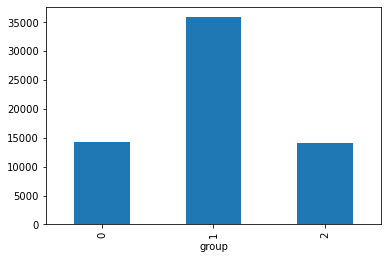

In [81]:
data.groupby('group')['TOTAL_ORDERS'].sum().plot(kind='bar')